ref: https://medium.com/@osas.usen/topic-extraction-from-tweets-using-lda-a997e4eb0985

In [10]:
# packages to store and manipulate data
import pandas as pd
#import numpy as np

# plotting packages
#import matplotlib.pyplot as plt
#import seaborn as sns

# model building package
#import sklearn

# package to clean text
import re

In [11]:
tweets =pd.read_csv('TwitterDataSentiments.csv',low_memory=False)

In [12]:
def getTopic(tweets):
    tweets['Text'] = tweets['Text'].astype(str)
    #After loading the data, we check through the tweets to find retweets.
    # make a new column to highlight retweets
    tweets['is_retweet'] = tweets['Text'].apply(lambda x: x[:2]=='RT')
    tweets['is_retweet'].sum()  # number of retweets
    # 10 most repeated tweets
    tweets.groupby(['Text']).size().reset_index(name='counts')\
    .sort_values('counts', ascending=False).head(10)
    # selecting cars with brand 'Maruti' and Mileage > 25
    tw = tweets.loc[(tweets.Text == 'headache')]
    tw = tw.drop(['Unnamed: 0', ],axis=1)
    tw = tw.drop(['is_retweet', ],axis=1)
    tw = tw.drop(['mentioned', ],axis=1)
    tw = tw.drop(['hashtags', ],axis=1)
    tw = tw.drop(['Date', ],axis=1)
    return tw

In [13]:
#tw = getTopic(tweets)

In [14]:
#tw

In [15]:
tweets['Text'] = tweets['Text'].astype(str)

In [16]:
#After loading the data, we check through the tweets to find retweets.

# make a new column to highlight retweets
tweets['is_retweet'] = tweets['Text'].apply(lambda x: x[:2]=='RT')
tweets['is_retweet'].sum()  # number of retweets

0

In [17]:
# 10 most repeated tweets
x =tweets.groupby(['Text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

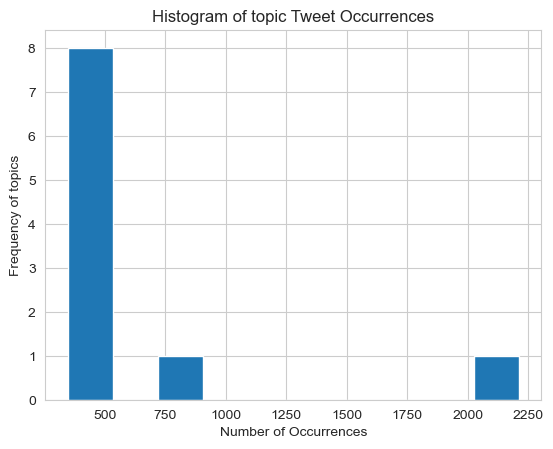

In [25]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'tweets' with a column named 'Text'

# Grouping by 'Text' and calculating the count of each unique text
tweet_counts = x#tweets.groupby('Text').size().reset_index(name='counts')

# Plotting a histogram
plt.hist(tweet_counts['counts'], bins=10)  # Adjust the number of bins as desired
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of topics')
plt.title('Histogram of topic Tweet Occurrences')
#plt.style(palette='YlGnBu_r')
plt.show()

In [27]:
# selecting cars with brand 'Maruti' and Mileage > 25
tw = tweets.loc[(tweets.Text == 'headache')]

In [28]:
tw

,Unnamed: 0,Date,Text,sentiments,is_retweet,mentioned,hashtags
1189,1189,06/04/2009 23:43,headache,Netural,False,[],[]
10761,10761,18/04/2009 08:00,headache,Netural,False,[],[]
12980,12980,18/04/2009 10:41,headache,Netural,False,[],[]
14327,14327,18/04/2009 14:49,headache,Netural,False,[],[]
16860,16860,18/04/2009 21:35,headache,Netural,False,[],[]
...,...,...,...,...,...,...,...
2083107,2083107,NaN,headache,Netural,False,[],[]
2084355,2084355,NaN,headache,Netural,False,[],[]
2085099,2085099,NaN,headache,Netural,False,[],[]
2090170,2090170,NaN,headache,Netural,False,[],[]


In [22]:
# 1st most repeated tweets
tw = tweets.groupby(['Text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(1)

In [24]:
tw = tweets.groupby(['Text'])

In [26]:
print(tw)

In [8]:
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
# make new columns for mentioned usernames and hashtags
tweets['mentioned'] = tweets.Text.apply(find_mentioned)
tweets['hashtags'] = tweets.Text.apply(find_hashtags)

In [9]:
tweets

,Unnamed: 0,Date,Text,sentiments,mentioned,hashtags
0,0,06/04/2009 22:19,switchfoot httptwitpiccomyzl a s bummer you sh...,Netural,[],[]
1,1,06/04/2009 22:19,upset cant update facebook texting it might cr...,Netural,[],[]
2,2,06/04/2009 22:19,kenichan i dived many times ball managed save ...,Positive,[],[]
3,3,06/04/2009 22:19,whole body feels itchy like fire,Positive,[],[]
4,4,06/04/2009 22:19,nationwideclass no not behaving all im mad her...,Negative,[],[]
...,...,...,...,...,...,...
2097145,2097145,NaN,opened mouth insert foot chewed really hard ho...,Negative,[],[]
2097146,2097146,NaN,trying move head potteringabout mode backtowor...,Netural,[],[]
2097147,2097147,NaN,sick twice already im still going school feel ...,Negative,[],[]
2097148,2097148,NaN,kherrylobrien boo ill blue side gotta keep mag...,Netural,[],[]
